# CIE_4140_Lecture_3_3_Python #

## Example 1: A harmonic load ##

In [1]:
import sympy as sp

In [2]:
u = sp.symbols('u',cls=sp.Function)
omega_n, F_0, m, Omega, zeta = sp.symbols('omega_n, F_0, m, Omega, zeta',real=True,positive=True)
t = sp.symbols('t',real=True)
u_0, v_0 = sp.symbols('u_0, v_0')

Equation of moation:

In [3]:
Equation_of_Motion= sp.Eq(sp.diff(u(t),t,2)+2*zeta*omega_n*sp.diff(u(t),t)+omega_n **2 * u(t),F_0*sp.cos(Omega*t)/m)
display(Equation_of_Motion)

Eq(omega_n**2*u(t) + 2*omega_n*zeta*Derivative(u(t), t) + Derivative(u(t), (t, 2)), F_0*cos(Omega*t)/m)

Load:

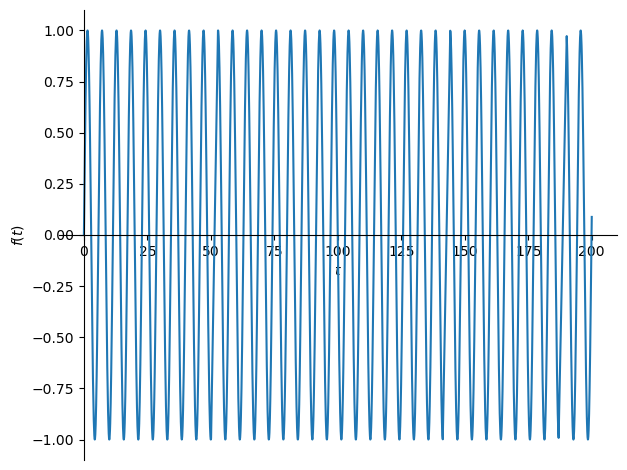

In [4]:
sp.plot(1*sp.sin(1.1*t)/1,(t,0,200));

Calculation of Duhamel integral (for some reason this cell only succeeds on the second try,this bug is reported https://github.com/sympy/sympy/issues/24518)

In [6]:
omega_1, t_tilda = sp.symbols('omega_1, t_tilda',real=True,positive=True)
u_forced = sp.simplify(F_0/m/omega_1 *sp.integrate(sp.sin(Omega*t_tilda)*sp.exp(-zeta*omega_n*(t-t_tilda))*sp.sin(omega_1*(t-t_tilda)),(t_tilda,0,t)))
display(u_forced)

F_0*(Omega**3*sin(omega_1*t) - Omega**2*omega_1*exp(omega_n*t*zeta)*sin(Omega*t) - Omega*omega_1**2*sin(omega_1*t) - 2*Omega*omega_1*omega_n*zeta*exp(omega_n*t*zeta)*cos(Omega*t) + 2*Omega*omega_1*omega_n*zeta*cos(omega_1*t) + Omega*omega_n**2*zeta**2*sin(omega_1*t) + omega_1**3*exp(omega_n*t*zeta)*sin(Omega*t) + omega_1*omega_n**2*zeta**2*exp(omega_n*t*zeta)*sin(Omega*t))*exp(-omega_n*t*zeta)/(m*omega_1*(Omega**4 - 2*Omega**2*omega_1**2 + 2*Omega**2*omega_n**2*zeta**2 + omega_1**4 + 2*omega_1**2*omega_n**2*zeta**2 + omega_n**4*zeta**4))

In [7]:
u_forced = u_forced.subs(omega_1,omega_n * sp.sqrt(1-zeta**2))
display(u_forced)

F_0*(Omega**3*sin(omega_n*t*sqrt(1 - zeta**2)) - Omega**2*omega_n*sqrt(1 - zeta**2)*exp(omega_n*t*zeta)*sin(Omega*t) + Omega*omega_n**2*zeta**2*sin(omega_n*t*sqrt(1 - zeta**2)) - 2*Omega*omega_n**2*zeta*sqrt(1 - zeta**2)*exp(omega_n*t*zeta)*cos(Omega*t) + 2*Omega*omega_n**2*zeta*sqrt(1 - zeta**2)*cos(omega_n*t*sqrt(1 - zeta**2)) - Omega*omega_n**2*(1 - zeta**2)*sin(omega_n*t*sqrt(1 - zeta**2)) + omega_n**3*zeta**2*sqrt(1 - zeta**2)*exp(omega_n*t*zeta)*sin(Omega*t) + omega_n**3*(1 - zeta**2)**(3/2)*exp(omega_n*t*zeta)*sin(Omega*t))*exp(-omega_n*t*zeta)/(m*omega_n*sqrt(1 - zeta**2)*(Omega**4 + 2*Omega**2*omega_n**2*zeta**2 - 2*Omega**2*omega_n**2*(1 - zeta**2) + omega_n**4*zeta**4 + 2*omega_n**4*zeta**2*(1 - zeta**2) + omega_n**4*(1 - zeta**2)**2))

In [8]:
response = (sp.exp(-zeta*omega_n*t)*(u_0*sp.cos(omega_n*t)+
                                    (v_0/(omega_n * sp.sqrt(1-zeta**2))+
                                     u_0*zeta*omega_n/(omega_n * sp.sqrt(1-zeta**2)))*sp.sin(omega_n*t))+
            u_forced)
display(response)

F_0*(Omega**3*sin(omega_n*t*sqrt(1 - zeta**2)) - Omega**2*omega_n*sqrt(1 - zeta**2)*exp(omega_n*t*zeta)*sin(Omega*t) + Omega*omega_n**2*zeta**2*sin(omega_n*t*sqrt(1 - zeta**2)) - 2*Omega*omega_n**2*zeta*sqrt(1 - zeta**2)*exp(omega_n*t*zeta)*cos(Omega*t) + 2*Omega*omega_n**2*zeta*sqrt(1 - zeta**2)*cos(omega_n*t*sqrt(1 - zeta**2)) - Omega*omega_n**2*(1 - zeta**2)*sin(omega_n*t*sqrt(1 - zeta**2)) + omega_n**3*zeta**2*sqrt(1 - zeta**2)*exp(omega_n*t*zeta)*sin(Omega*t) + omega_n**3*(1 - zeta**2)**(3/2)*exp(omega_n*t*zeta)*sin(Omega*t))*exp(-omega_n*t*zeta)/(m*omega_n*sqrt(1 - zeta**2)*(Omega**4 + 2*Omega**2*omega_n**2*zeta**2 - 2*Omega**2*omega_n**2*(1 - zeta**2) + omega_n**4*zeta**4 + 2*omega_n**4*zeta**2*(1 - zeta**2) + omega_n**4*(1 - zeta**2)**2)) + (u_0*cos(omega_n*t) + (u_0*zeta/sqrt(1 - zeta**2) + v_0/(omega_n*sqrt(1 - zeta**2)))*sin(omega_n*t))*exp(-omega_n*t*zeta)

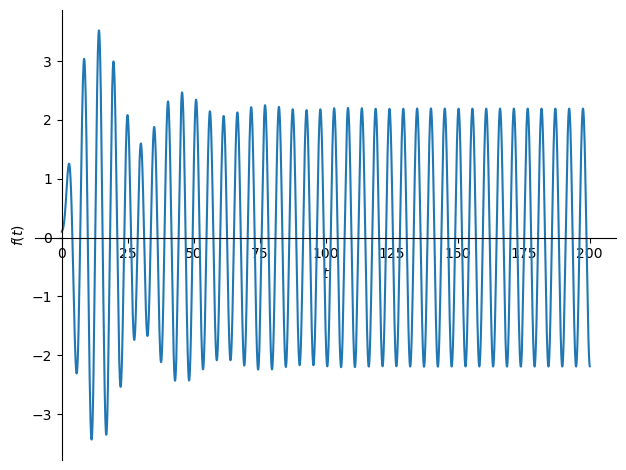

In [9]:
sp.plot(response.subs([(u_0,0.1),(v_0,0.1),(F_0,1),(omega_n,1),(zeta,0.05),(m,1),(Omega,1.2)]), (t , 0 , 200));

In [10]:
%matplotlib notebook

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [12]:
response_func = sp.lambdify((u_0,v_0,F_0,omega_n,zeta,m,Omega,t),response)

<IPython.core.display.Javascript object>


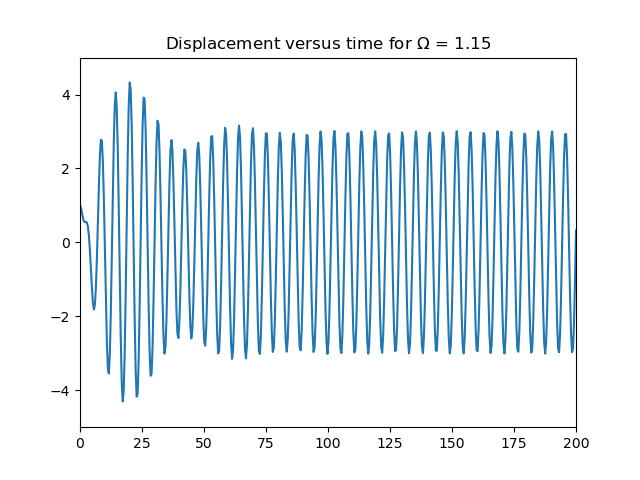

In [15]:
fig, ax = plt.subplots()
tdata = np.linspace(0,200,500)
line, = ax.plot([], [])
ax.set_xlim(0, 200)
ax.set_ylim(-5, 5)

def update(frame):
    ydata = response_func(u_0=1,v_0=0,m=1,omega_n=1,F_0=1,zeta=0.05,Omega=frame,t=tdata)
    ax.set_title("Displacement versus time for $\Omega$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(1.1,1.6,100),interval = 100)
plt.show()

<IPython.core.display.Javascript object>


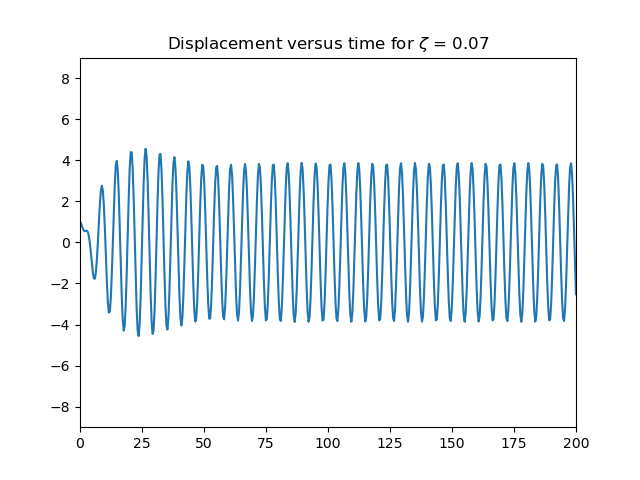

In [16]:
fig, ax = plt.subplots()
tdata = np.linspace(0,200,500)
line, = ax.plot([], [])
ax.set_xlim(0, 200)
ax.set_ylim(-9, 9)

def update(frame):
    ydata = response_func(u_0=1,v_0=0,m=1,omega_n=1,F_0=1,zeta=frame,Omega=1.1,t=tdata)
    ax.set_title("Displacement versus time for $\zeta$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.01,0.3,100),interval = 100)
plt.show()

## Example 2: a suddenly applied constant load ##

Equation of motion:

In [17]:
t = sp.symbols('t',real=True)
Equation_of_Motion= sp.Eq(sp.diff(u(t),t,2)+2*zeta*omega_n*sp.diff(u(t),t)+omega_n **2 * u(t),F_0*sp.Heaviside(t)/m)
display(Equation_of_Motion)

Eq(omega_n**2*u(t) + 2*omega_n*zeta*Derivative(u(t), t) + Derivative(u(t), (t, 2)), F_0*Heaviside(t)/m)

Load

<IPython.core.display.Javascript object>


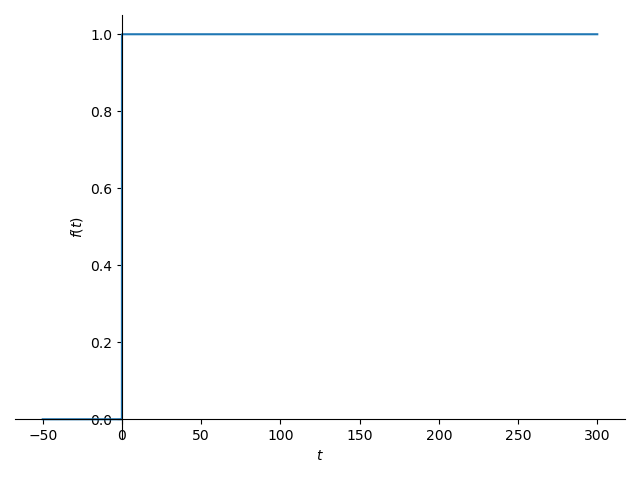

In [18]:
sp.plot(sp.Heaviside(t-0),(t,-50,300));

Calculation of Duhamel integral

In [19]:
u_forced = sp.simplify(F_0/m/omega_1 *sp.integrate(sp.exp(-zeta*omega_n*(t-t_tilda))*sp.sin(omega_1*(t-t_tilda)),(t_tilda,0,t)))
display(u_forced)

F_0*(omega_1*exp(omega_n*t*zeta) - omega_1*cos(omega_1*t) - omega_n*zeta*sin(omega_1*t))*exp(-omega_n*t*zeta)/(m*omega_1*(omega_1**2 + omega_n**2*zeta**2))

The total solution

In [20]:
response = (sp.exp(-zeta*omega_n*t)*(u_0*sp.cos(omega_n*t)+
                                    (v_0/(omega_n * sp.sqrt(1-zeta**2))+
                                     u_0*zeta*omega_n/(omega_n * sp.sqrt(1-zeta**2)))*sp.sin(omega_n*t))+
            u_forced.subs(omega_1,omega_n*sp.sqrt(1-zeta**2)))
display(response)

F_0*(-omega_n*zeta*sin(omega_n*t*sqrt(1 - zeta**2)) + omega_n*sqrt(1 - zeta**2)*exp(omega_n*t*zeta) - omega_n*sqrt(1 - zeta**2)*cos(omega_n*t*sqrt(1 - zeta**2)))*exp(-omega_n*t*zeta)/(m*omega_n*sqrt(1 - zeta**2)*(omega_n**2*zeta**2 + omega_n**2*(1 - zeta**2))) + (u_0*cos(omega_n*t) + (u_0*zeta/sqrt(1 - zeta**2) + v_0/(omega_n*sqrt(1 - zeta**2)))*sin(omega_n*t))*exp(-omega_n*t*zeta)

<IPython.core.display.Javascript object>


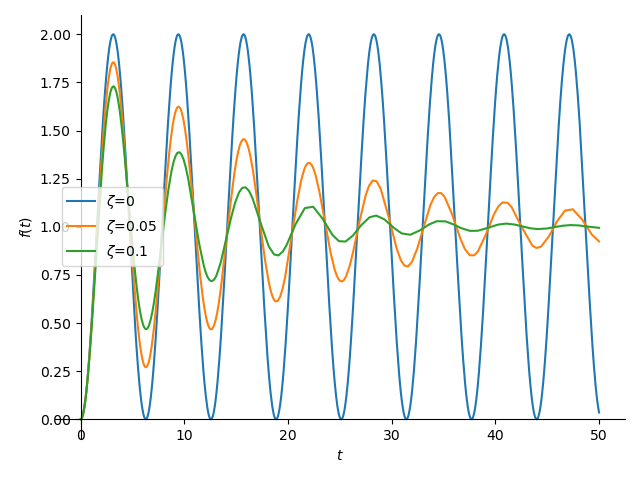

In [21]:
p0 = sp.plotting.plot(response.subs([(u_0,0),(v_0,0),(F_0,1),(m,1),(omega_n,1),(zeta,0   )]), (t , 0 , 50),label='$\zeta$=0'    ,legend=True,show=False)
p1 = sp.plotting.plot(response.subs([(u_0,0),(v_0,0),(F_0,1),(m,1),(omega_n,1),(zeta,0.05)]), (t , 0 , 50),label='$\zeta$=0.05' ,show=False)
p2 = sp.plotting.plot(response.subs([(u_0,0),(v_0,0),(F_0,1),(m,1),(omega_n,1),(zeta,0.1 )]), (t , 0 , 50),label='$\zeta$=0.1'  ,show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.show()

In [22]:
response_func = sp.lambdify((u_0,v_0,F_0,omega_n,zeta,m,t),response)

<IPython.core.display.Javascript object>


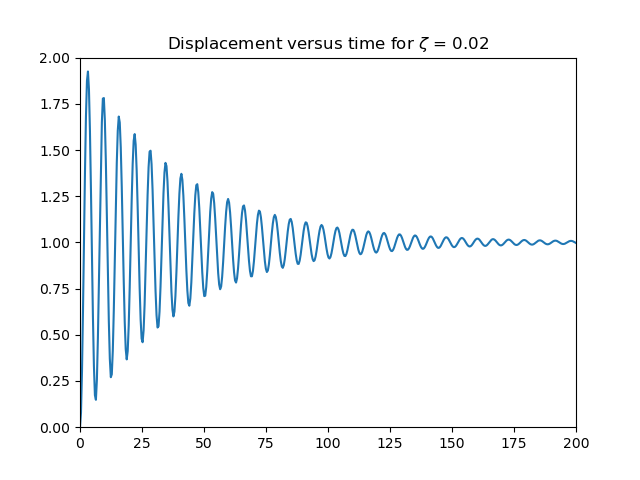

In [23]:
fig, ax = plt.subplots()
tdata = np.linspace(0,200,500)
line, = ax.plot([], [])
ax.set_xlim(0, 200)
ax.set_ylim(0,2)

def update(frame):
    ydata = response_func(u_0=0,v_0=0,m=1,omega_n=1,F_0=1,zeta=frame,t=tdata)
    ax.set_title("Displacement versus time for $\zeta$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.,0.2,100),interval = 100)
plt.show()

## Example 3: a suddenly applied constant load of finite duration ##

Equation of motion

In [24]:
dt = sp.symbols('dt',real=True,positive=True)
Equation_of_Motion= sp.Eq(sp.diff(u(t),t,2)+2*zeta*omega_n*sp.diff(u(t),t)+omega_n **2 * u(t),F_0*(sp.Heaviside(t)-sp.Heaviside(t-dt))/m)
display(Equation_of_Motion)

Eq(omega_n**2*u(t) + 2*omega_n*zeta*Derivative(u(t), t) + Derivative(u(t), (t, 2)), F_0*(Heaviside(t) - Heaviside(-dt + t))/m)

Load:

<IPython.core.display.Javascript object>


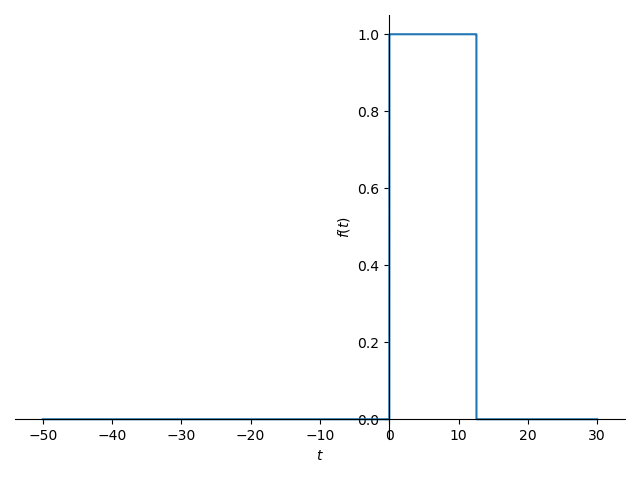

In [25]:
sp.plot(sp.Heaviside(t)-sp.Heaviside(t-4*sp.pi),(t,-50,30));

Calculation of the Duhamel integral

if $t<dt$ then:

In [26]:
u_forced_1 = sp.simplify(F_0/m/omega_1 *sp.integrate(sp.exp(-zeta*omega_n*(t-t_tilda))*sp.sin(omega_1*(t-t_tilda)),(t_tilda,0,t)))
display(u_forced_1)

F_0*(omega_1*exp(omega_n*t*zeta) - omega_1*cos(omega_1*t) - omega_n*zeta*sin(omega_1*t))*exp(-omega_n*t*zeta)/(m*omega_1*(omega_1**2 + omega_n**2*zeta**2))

if $t>dt$ then:

In [27]:
u_forced_2 = sp.simplify(F_0/m/omega_1 *sp.integrate(sp.exp(-zeta*omega_n*(t-t_tilda))*sp.sin(omega_1*(t-t_tilda)),(t_tilda,0,dt)))
display(u_forced_2)

F_0*(omega_1*exp(dt*omega_n*zeta)*cos(omega_1*(dt - t)) - omega_1*cos(omega_1*t) - omega_n*zeta*exp(dt*omega_n*zeta)*sin(omega_1*(dt - t)) - omega_n*zeta*sin(omega_1*t))*exp(-omega_n*t*zeta)/(m*omega_1*(omega_1**2 + omega_n**2*zeta**2))

The total solution:

In [28]:
response = (sp.exp(-zeta*omega_n*t)*(u_0*sp.cos(omega_n*t)+
                                    (v_0/(omega_n * sp.sqrt(1-zeta**2))+
                                     u_0*zeta*omega_n/(omega_n * sp.sqrt(1-zeta**2)))*sp.sin(omega_n*t))+
            sp.Piecewise((u_forced_1.subs(omega_1,omega_n*sp.sqrt(1-zeta**2)),t<dt),
                         (u_forced_2.subs(omega_1,omega_n*sp.sqrt(1-zeta**2)),True)))
display(response)

(u_0*cos(omega_n*t) + (u_0*zeta/sqrt(1 - zeta**2) + v_0/(omega_n*sqrt(1 - zeta**2)))*sin(omega_n*t))*exp(-omega_n*t*zeta) + Piecewise((F_0*(-omega_n*zeta*sin(omega_n*t*sqrt(1 - zeta**2)) + omega_n*sqrt(1 - zeta**2)*exp(omega_n*t*zeta) - omega_n*sqrt(1 - zeta**2)*cos(omega_n*t*sqrt(1 - zeta**2)))*exp(-omega_n*t*zeta)/(m*omega_n*sqrt(1 - zeta**2)*(omega_n**2*zeta**2 + omega_n**2*(1 - zeta**2))), dt > t), (F_0*(-omega_n*zeta*exp(dt*omega_n*zeta)*sin(omega_n*sqrt(1 - zeta**2)*(dt - t)) - omega_n*zeta*sin(omega_n*t*sqrt(1 - zeta**2)) + omega_n*sqrt(1 - zeta**2)*exp(dt*omega_n*zeta)*cos(omega_n*sqrt(1 - zeta**2)*(dt - t)) - omega_n*sqrt(1 - zeta**2)*cos(omega_n*t*sqrt(1 - zeta**2)))*exp(-omega_n*t*zeta)/(m*omega_n*sqrt(1 - zeta**2)*(omega_n**2*zeta**2 + omega_n**2*(1 - zeta**2))), True))

In [29]:
response_func = sp.lambdify((u_0,v_0,F_0,omega_n,zeta,m,t,dt),response)

<IPython.core.display.Javascript object>


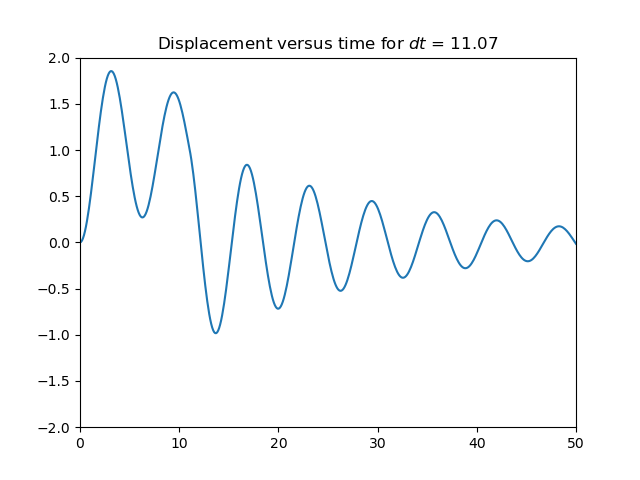

In [30]:
fig, ax = plt.subplots()
tdata = np.linspace(0,50,500)
line, = ax.plot([], [])
ax.set_xlim(0, 50)
ax.set_ylim(-2,2)

def update(frame):
    ydata = response_func(u_0=0,v_0=0,m=1,omega_n=1,F_0=1,zeta=0.05,dt=frame,t=tdata)
    ax.set_title("Displacement versus time for $dt$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(3*np.pi,5*np.pi,100),interval = 100)
plt.show()

<IPython.core.display.Javascript object>


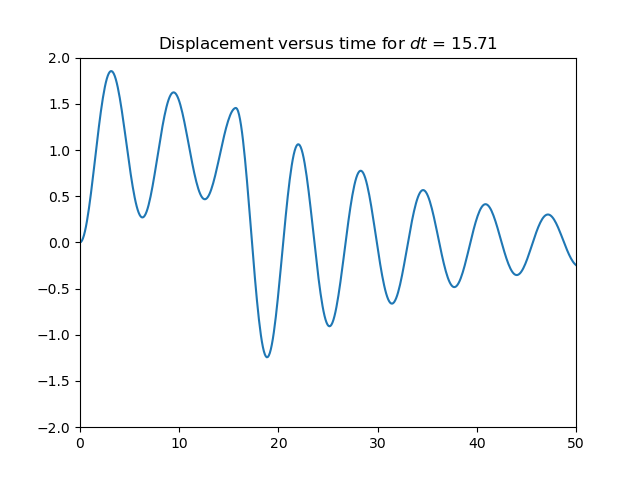

In [32]:
fig, ax = plt.subplots()
tdata = np.linspace(0,50,500)
line, = ax.plot([], [])
ax.set_xlim(0, 50)
ax.set_ylim(-2,2)
i=0
for frame in np.linspace(3*np.pi,5*np.pi,100):
    def update(frame):
        ydata = response_func(u_0=0,v_0=0,m=1,omega_n=1,F_0=1,zeta=0.05,dt=frame,t=tdata)
        ax.set_title("Displacement versus time for $dt$ = "+str(np.round(frame,2)))
        line.set_data(tdata, ydata)
    update(frame)
    plt.savefig(f'img_{i}.png',transparent = False,facecolor = 'white')
    i+=1


In [34]:
import imageio
frames = []
for t in range(100):
    image = imageio.v2.imread(f'img_{t}.png')
    frames.append(image)

imageio.mimsave('./example.gif', # output gif
                frames,          # array of input frames
                fps = 10)         # optional: frames per second

<IPython.core.display.Javascript object>


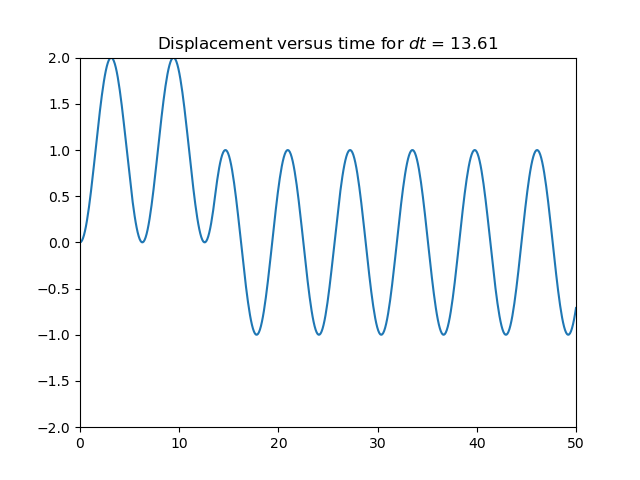

In [31]:
fig, ax = plt.subplots()
tdata = np.linspace(0,50,500)
line, = ax.plot([], [])
ax.set_xlim(0, 50)
ax.set_ylim(-2,2)

def update(frame):
    ydata = response_func(u_0=0,v_0=0,m=1,omega_n=1,F_0=1,zeta=0,dt=frame,t=tdata)
    ax.set_title("Displacement versus time for $dt$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(3*np.pi,5*np.pi,100),interval = 100)
plt.show()